<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-1">Importing Libraries and Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Reminding-ourselves-what-we-are-working-with." data-toc-modified-id="Reminding-ourselves-what-we-are-working-with.-1.0.1">Reminding ourselves what we are working with.</a></span></li></ul></li><li><span><a href="#Reviewing-Column-Names-and-Descriptions-for-King-County-Data-Set" data-toc-modified-id="Reviewing-Column-Names-and-Descriptions-for-King-County-Data-Set-1.1">Reviewing Column Names and Descriptions for King County Data Set</a></span><ul class="toc-item"><li><span><a href="#Reopening-our-cleaned-dataframe" data-toc-modified-id="Reopening-our-cleaned-dataframe-1.1.1">Reopening our cleaned dataframe</a></span></li></ul></li><li><span><a href="#Getting-a-Fresh-Look" data-toc-modified-id="Getting-a-Fresh-Look-1.2">Getting a Fresh Look</a></span><ul class="toc-item"><li><span><a href="#Viewing-correlation-data-in-plots" data-toc-modified-id="Viewing-correlation-data-in-plots-1.2.1">Viewing correlation data in plots</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.2.2">Histograms</a></span></li><li><span><a href="#Taking-a-Look-at-Data-Distributions" data-toc-modified-id="Taking-a-Look-at-Data-Distributions-1.2.3">Taking a Look at Data Distributions</a></span></li><li><span><a href="#Let's-create-separate-dataframes-for-our-target-and-for-our-dependent-variable." data-toc-modified-id="Let's-create-separate-dataframes-for-our-target-and-for-our-dependent-variable.-1.2.4">Let's create separate dataframes for our target and for our dependent variable.</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2">EDA</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-2.1">Dealing with Outliers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-----" data-toc-modified-id="------2.1.0.1">-- --</a></span></li></ul></li><li><span><a href="#Inspection-Notes:" data-toc-modified-id="Inspection-Notes:-2.1.1">Inspection Notes:</a></span></li><li><span><a href="#Import-necessary-map-libraries" data-toc-modified-id="Import-necessary-map-libraries-2.1.2">Import necessary map libraries</a></span></li><li><span><a href="#Mapping" data-toc-modified-id="Mapping-2.1.3">Mapping</a></span></li></ul></li><li><span><a href="#Checking-Normalcy" data-toc-modified-id="Checking-Normalcy-2.2">Checking Normalcy</a></span></li><li><span><a href="#OLS-and-Colinearity" data-toc-modified-id="OLS-and-Colinearity-2.3">OLS and Colinearity</a></span></li><li><span><a href="#Jarque--Bera-and-Kurtosis" data-toc-modified-id="Jarque--Bera-and-Kurtosis-2.4">Jarque -Bera and Kurtosis</a></span></li><li><span><a href="#Questions-and-Desired-Variables" data-toc-modified-id="Questions-and-Desired-Variables-2.5">Questions and Desired Variables</a></span></li><li><span><a href="#Colinearity-and" data-toc-modified-id="Colinearity-and-2.6">Colinearity and</a></span></li></ul></li><li><span><a href="#NOTES:" data-toc-modified-id="NOTES:-3">NOTES:</a></span></li></ul></div>

##### explore notebook--eda and transform
***

# Importing Libraries and Data

### Reminding ourselves what we are working with.

## Reviewing Column Names and Descriptions for King County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reopening our cleaned dataframe

In [2]:
with open('data_f.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_f = pickle.load(f)
data_f.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0,...,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,...,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,...,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,...,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,...,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0


Dataframe successfully imported from `pickle`.
***
## Getting a Fresh Look

Before getting too deliberate, let's step back a bit to take in visually our data.

In [3]:
# first a kitchen sink of correlations
df_corr = data_f.corr()
df_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.010621
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845,0.117543
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.017635
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,0.046742
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,0.050829
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005091
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.003713
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.074267
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083,0.090480
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.055383


Okay, so I am not sure what I thought I might see, there. ...Not a sight for sore eyes.

### Viewing correlation data in plots

This should be easier to look at:

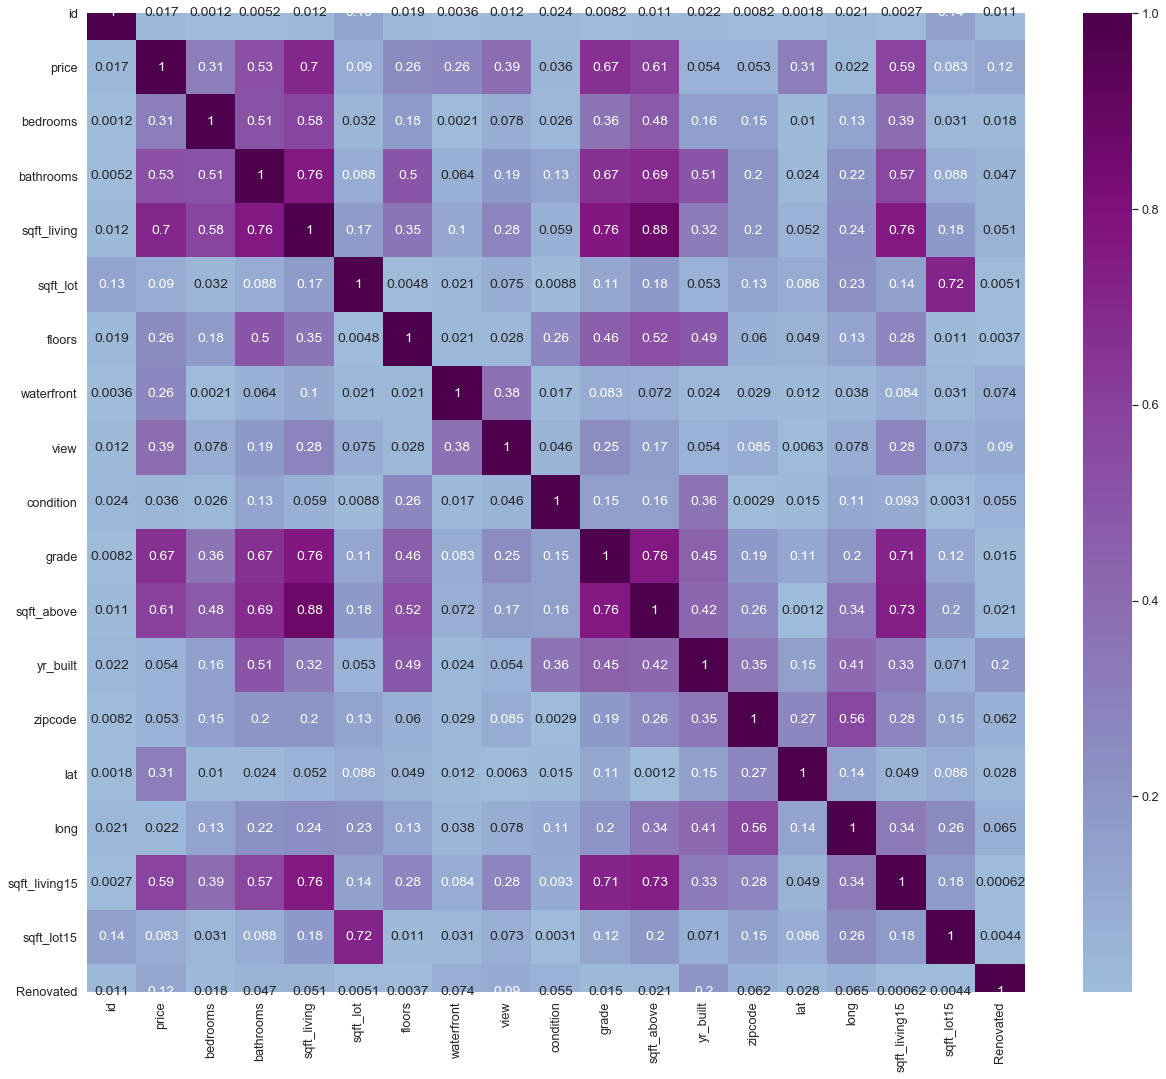

In [4]:
# creating a figure to plot a heatmap from `data_f` correlations
plt.figure(figsize=(21,18))
sns.set(font_scale=1.15) # making annotations legible

# plotting, leaving - in `id` to avoid cropping more useful values
sns.heatmap(df_corr.abs(), center=.2, annot=True, cmap="BuPu")
plt.show()

* Square feet features are strong, out of the gate.
* `bathrooms` has what might initially be a surprising edge over bedrooms, but I suppose that is to be expected in homes with larger living/ entertainment spaces.
* `zipcode`seems worthy of a further exploration.
* On the other hand, renovations appear to have surprisingly low influence over price. Again, there may be explanations for that. Even before taking data normalization into consideration, I can imagine a fair number of renovations were undertaken to catch - up with a market for which owners were not prepared.

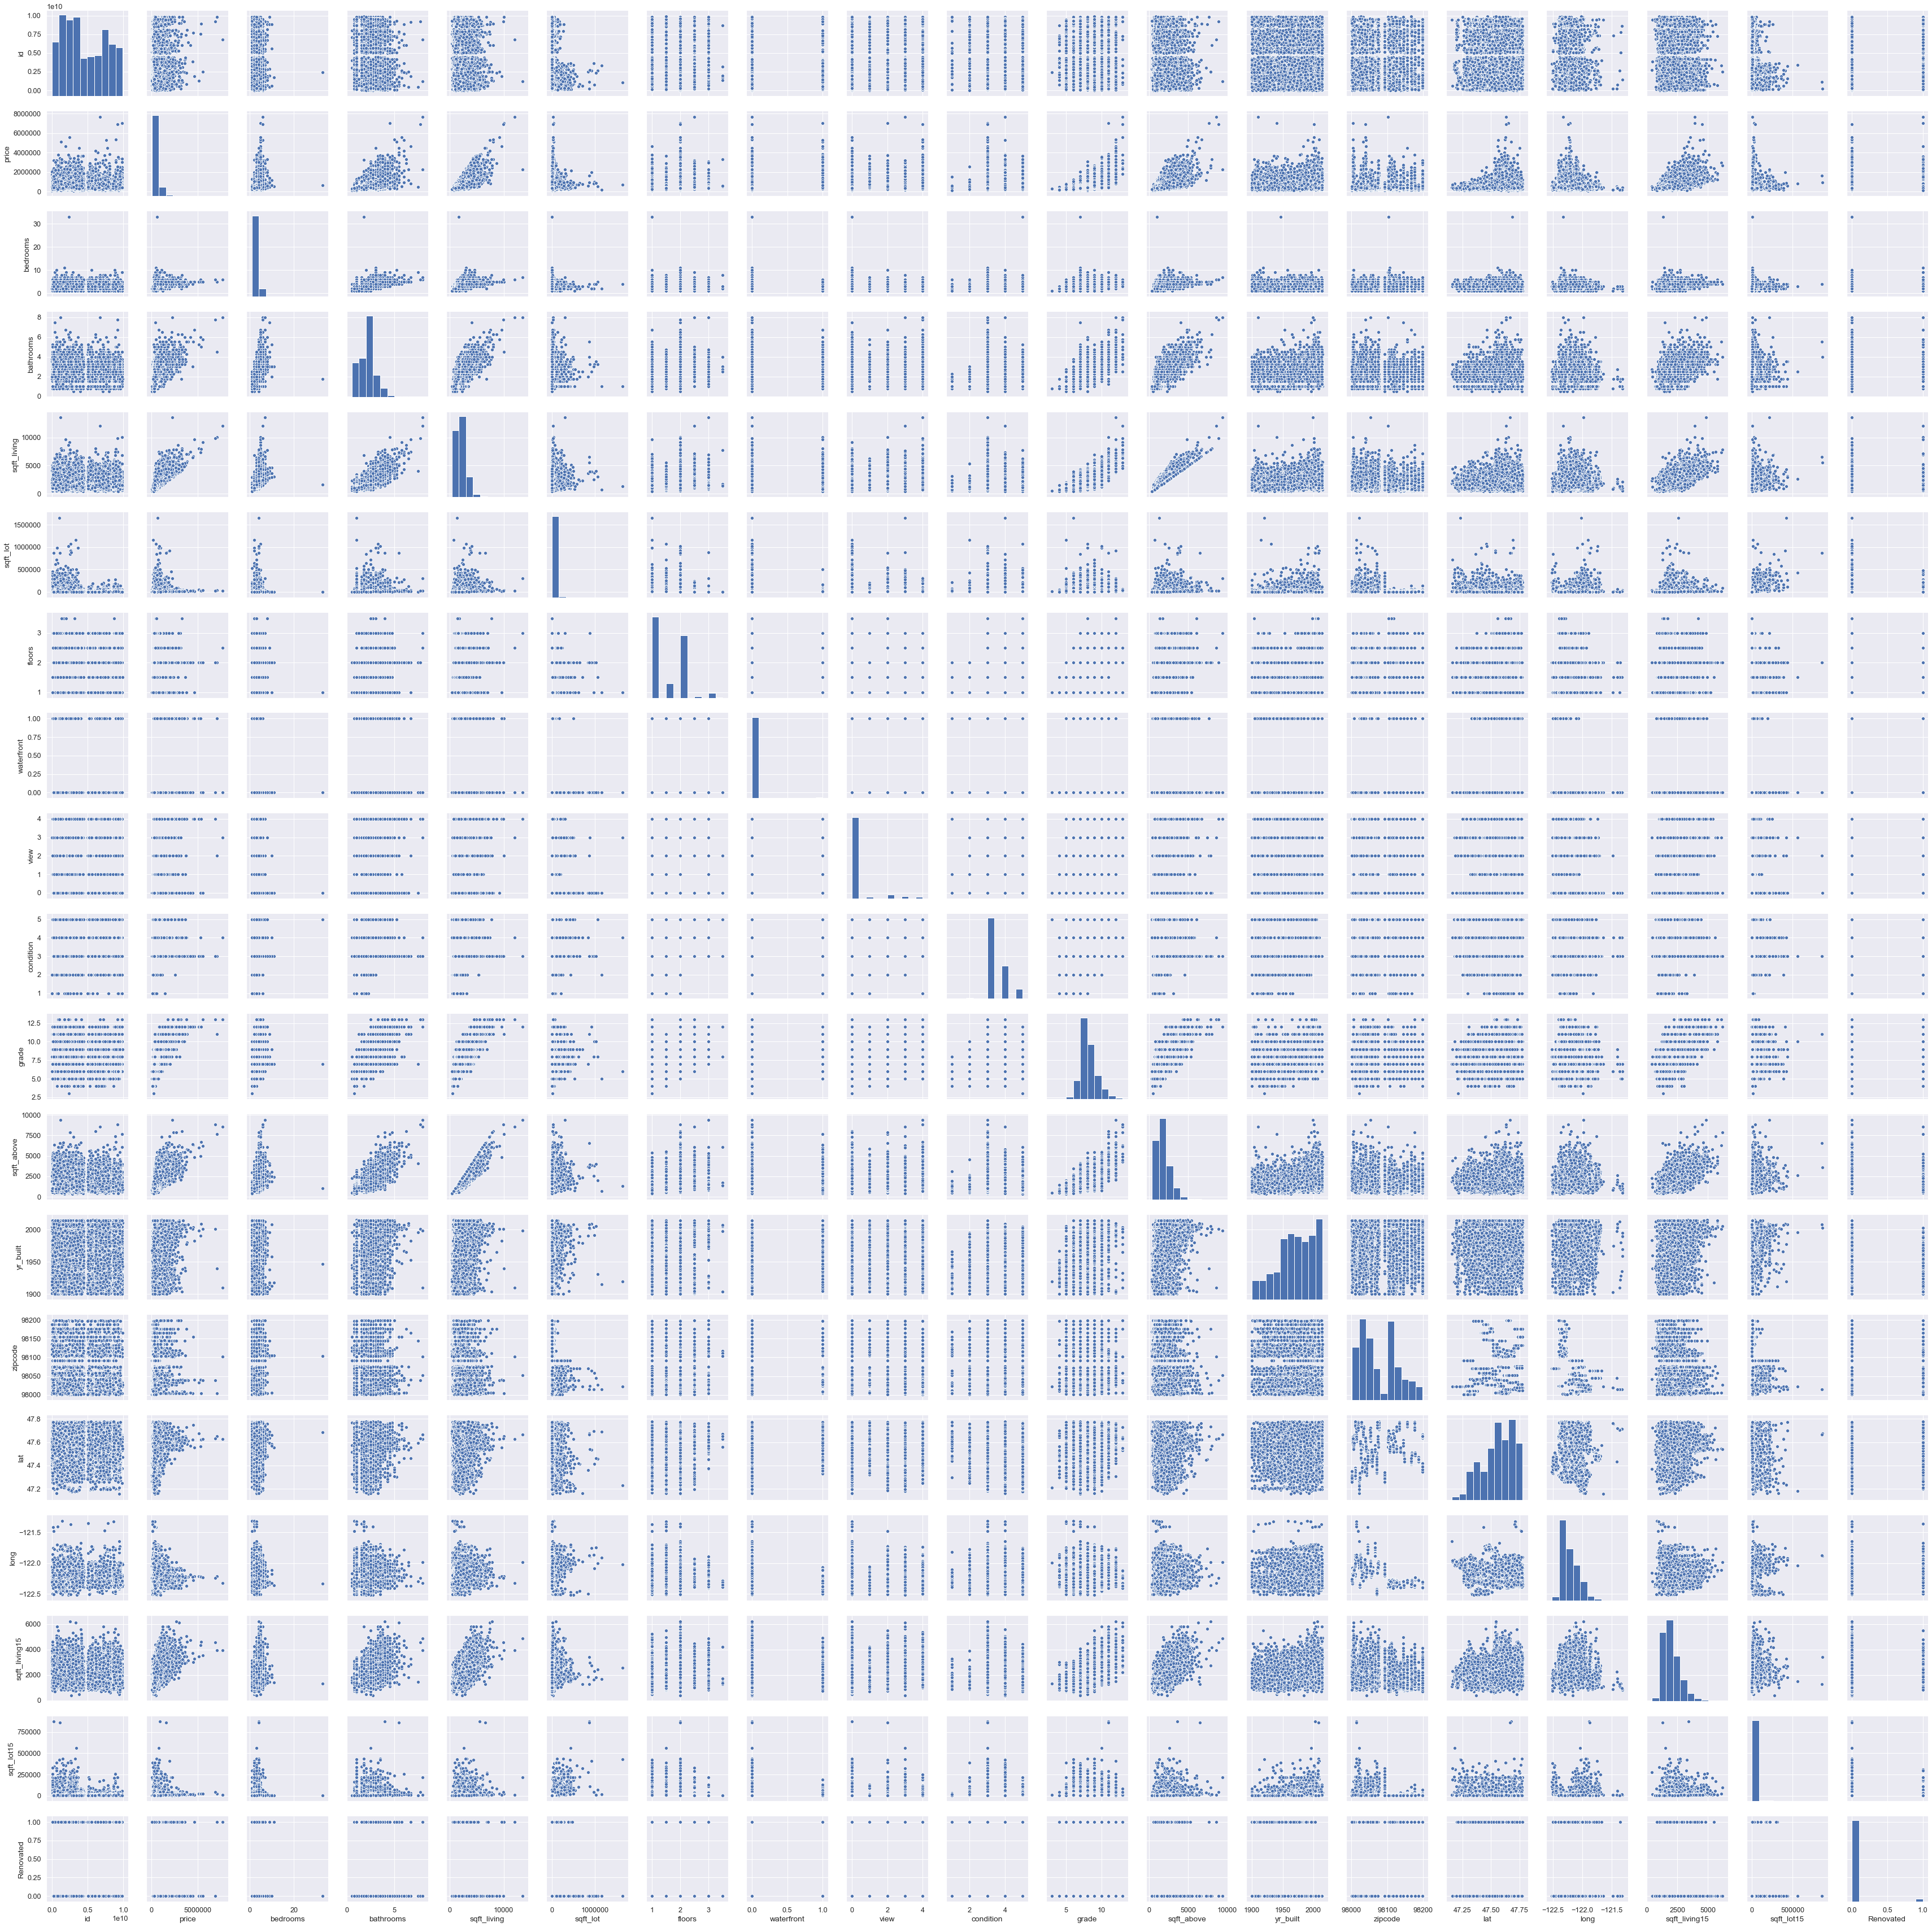

In [5]:
# viewing pairwise relationships
sns.pairplot(data_f)
plt.show()

The pairplots give a feel for just how much of the data is categorical.

### Histograms

### Taking a Look at Data Distributions

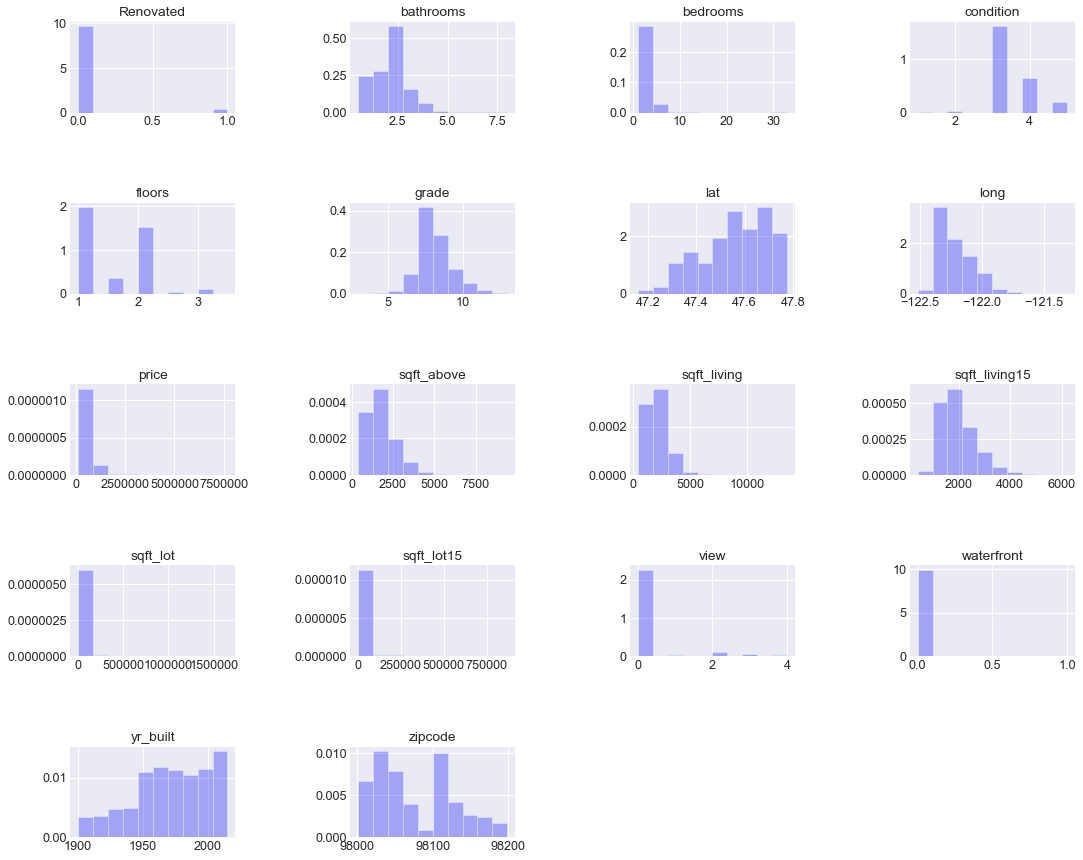

In [6]:
# view histograms for all colums except `id`
plt.style.use('seaborn-darkgrid')
data_f.hist(figsize=(18,15), column=[col for col in data_f.columns[1:]],
            density=True, bins=10, alpha=.3, color='blue')  # Plot specific columns
plt.subplots_adjust(wspace=.7, hspace=1)
plt.show()

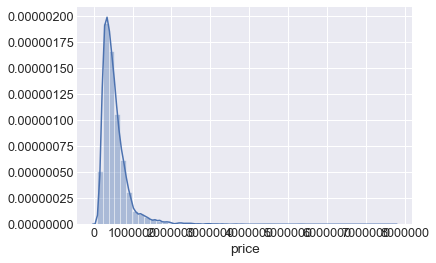

In [7]:
# view pair plotted data
sns.distplot(data_f.price)
sns.set(font_scale=.8); # try to prevent overlap of long column names
# plt.subplots_adjust(wspace=.02, hspace=.2);
plt.show()

### Let's create separate dataframes for our target and for our dependent variable.

# EDA

## Dealing with Outliers

> **Should `waterfront` outliers be dropped?**

In [ ]:
# Compare `waterfront` to all and non - waterfront property values
p_0 = data[data['waterfront'] == 0]['price']
p_1 = data[data['waterfront'] == 1]['price']
r_2 = round(2)

print("All properties min: ", data.price.min().round(2))
print("Waterfront min:    ", p_1.min().round(2))
print("No waterfront min:  ", p_0.min().round(2))
print("-"*80)
print("All properties mean: ", data.price.mean().round(2))
print("Waterfront mean:    ", p_1.mean().round(2))
print("No waterfront mean:  ", p_0.mean().round(2))
print("-"*80)
print("All properties median: ", data.price.median().round(2))
print("Waterfront median:    ", p_1.median().round(2))
print("No waterfront median:  ", p_0.median().round(2))
print("-"*80)
print("All properties max: ", data.price.max().round(2))
print("Waterfront max:     ", p_1.max().round(2))
print("No waterfront max:  ", p_0.max().round(2))

*****
#### -- --

### Inspection Notes:

* 
* 
* 
* 
* 
* 
* 

We can inspect a selection of these properties using the `folium` library to verify their proximity to waterfront locations. Plan to convert nulls to 0s, barring controverting discovery.

### Import necessary map libraries

In [ ]:
# King County lat./ Long. coordinates: 47.5480° N, -121.9836° W
import os
import json
import folium
# from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Mapping

In [ ]:
# mapping Seattle coordinates
locations = wf_null_list

In [ ]:
# getting residences' lat/ lon coordinates to separate lists
lats = [location[0] for location in locations]
lons = [location[1] for location in locations]

# centering the map on the mean coordinates for the residences
m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=7
)

FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)

folium.LayerControl().add_to(m)
m.save(os.path.join('results', '5_MarkerCluster1.html'))

m

In [ ]:
# properties are not on waterfront
# fill `waterfront` nulls with 0s
data_f.waterfront.fillna(value=0, inplace=True)

`waterfront` appears to be a valid and consistent variable, so we will ___deal with its missing values by filling with 0___

## Checking Normalcy
## OLS and Colinearity
## Jarque -Bera and Kurtosis
## Questions and Desired Variables
## Colinearity and

# NOTES:

> 